In [1]:
# importing prerequisite libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Lesson Overview
<div class='alert alert-success'>
So far, we have focused on univariate visualizations which comprise on a single variable e.g. weight, height etc to visualize.
</div>

The current lesson focuses on bivariate visualizations, meaning those visualizations involving two variables. The variation in one variable will affect the value of the other variable.

By the end of this lesson, you will be able to create and analyze different types of bivariate visualizations for all possible combinations of qualitative and quantitative variables. You will learn to code the following types of visualizations:

* heat maps,
* scatterplots,
* violin plots,
* box plots,
* clustered bar charts,
* faceting, and
* line plots

At the end of the lesson, we have introduced a few different visualizations, particularly, swarm, rug, strip, and stacked plots.

## Scatterplots and correlation

<p style='font-size:16px; font-weight:bold'>If we want to see the difference between 2 quantitative variable then the go to plot is Scatterplots</p>

**Pearson cofficient correlation**
***
Person cofficient correlation is the strength of two variable having linear correlation between them. (-1 , 0 , 1)

In [2]:
fuel_econ = pd.read_csv('./fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


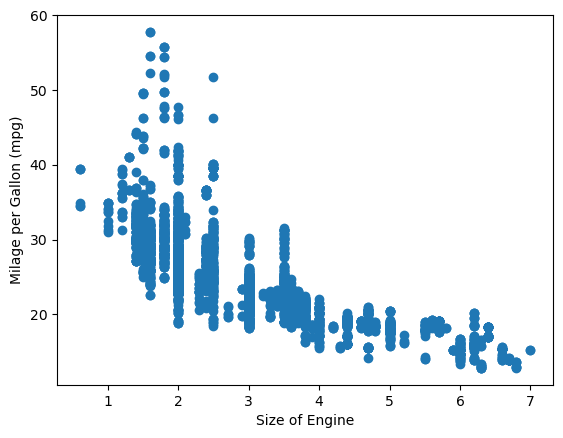

In [3]:
# Checking the relation between 'displ' and 'comb' (milage per litre) to check whether the comb is increase while 'displ' 
# increase like to see whether between them positive correlation or negative correlation are they are neutral.

plt.scatter(data = fuel_econ,x = 'displ', y = 'comb')
plt.xlabel(xlabel='Size of Engine')
plt.ylabel(ylabel='Milage per Gallon (mpg)');

# As we can see below both variable have negative correlation because if y-axis increase the x-axis decrease

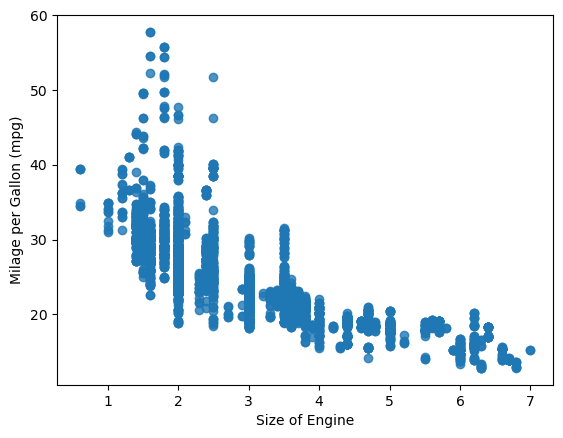

In [4]:
# The equavalent of scatter plot in seaborn is regplot() means regression plot this will add an additional regression line
# to the plot to see the relation more clearly we can turn of regression line by passing a parameter 'fit_req=False'

sb.regplot(data=fuel_econ, x='displ' , y='comb' , fit_reg=False)
plt.xlabel(xlabel='Size of Engine')
plt.ylabel(ylabel='Milage per Gallon (mpg)');



#### Note - In this example, the x- and y- values sent to regplot are set directly as Series, extracted from the dataframe.

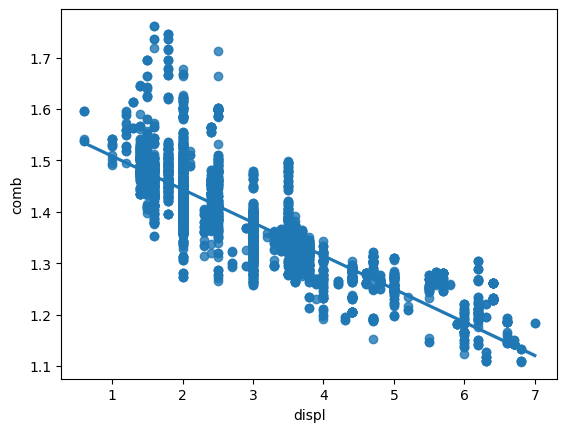

In [5]:


# here below the apply() method will be applied on the row/column elements one by one. The apply method take function as 
# argument so we can define this function outside and then call it here e.g.

def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)
    
    
sb.regplot(x=fuel_econ['displ'], y=fuel_econ['comb'].apply(log_trans));


### Overplotting, Transparency and Jitter
<b> In some certain circumstances we have a large no of data that will show on scatter plot very jumbled which will be 
    difficult to interpret.
    Also we will be dealing with data that are numerical in nature so it will be difficult for us to see the disctribution of
    data points. This is called overplotting.
</b>
***
Overplotting can be resolved with three techniques: 
    
    * Sampling
    * Transparency
    * Jitter
    
For example Below in the image the density of the Transparency in the data points represent the quantity of variables
and those with multiple datapoint in the same region have added Jitter to it e.g below some data points shown 5-6 near to each other.
![Image of Transparency](https://1329420134-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LagOeJ2nL90MQERwhxy%2F-LhztFSAJD4EqPWDhd4h%2F-Li-fMI6Em9wcCZtJdRv%2Fimage.png?alt=media&token=9d9a0ef4-c650-4f59-a0a7-b7eac51dc255)

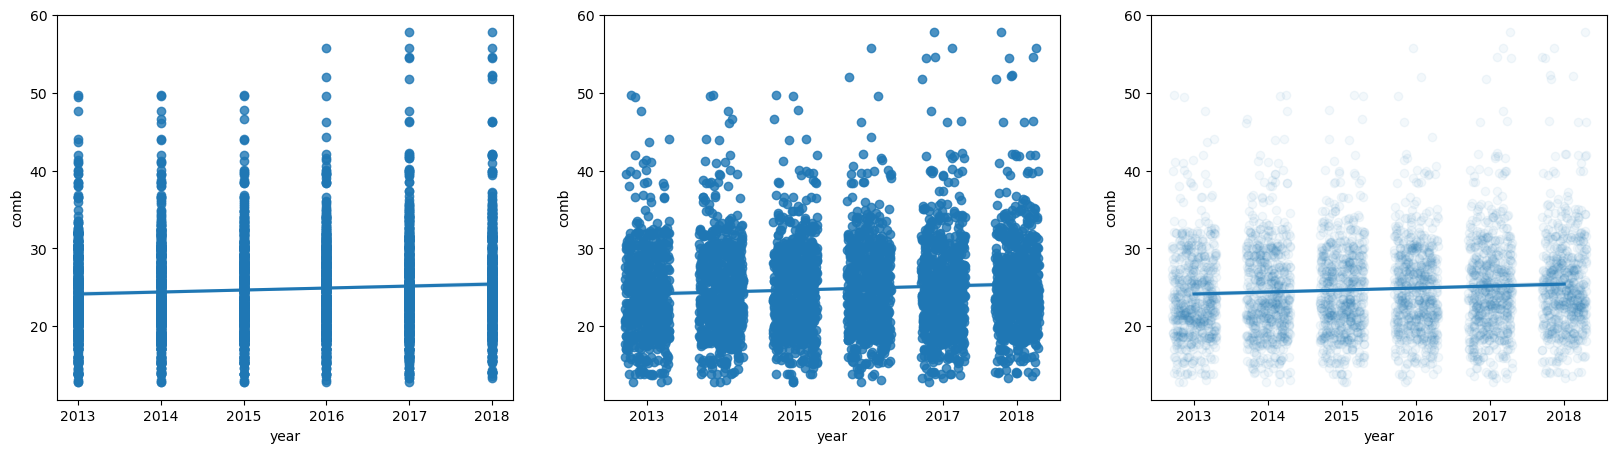

In [6]:
# Creating figure of size 20x5 (width x height)
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sb.regplot(data=fuel_econ,x='year',y='comb');

plt.subplot(1,3,2)

# applying 0.3 jitter will add random points around the actual data points.
sb.regplot(data=fuel_econ,x='year',y='comb',x_jitter=0.3);

# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
plt.subplot(1,3,3)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter=0.3, scatter_kws={'alpha':1/20});

<p style='font-size: 18px; color:#117788; font-family:cursive'> 
    In the left scatter plot above, the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. The right scatter plot has a jitter introduced to the data points. To make the second graph more clear we need to add Transparency to the data points so that we can see the frequency of data points more clearly.<hr>
We can add transparency to either scatter() or regplot() by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). See the example below.
    </p>

## Heat maps
* Heat maps is for quantitative vs quantitative variables.
* Heat maps is like 3D version of scatter plot 
* Heat map can be implemented using `Matplotlib.hist2d()` function

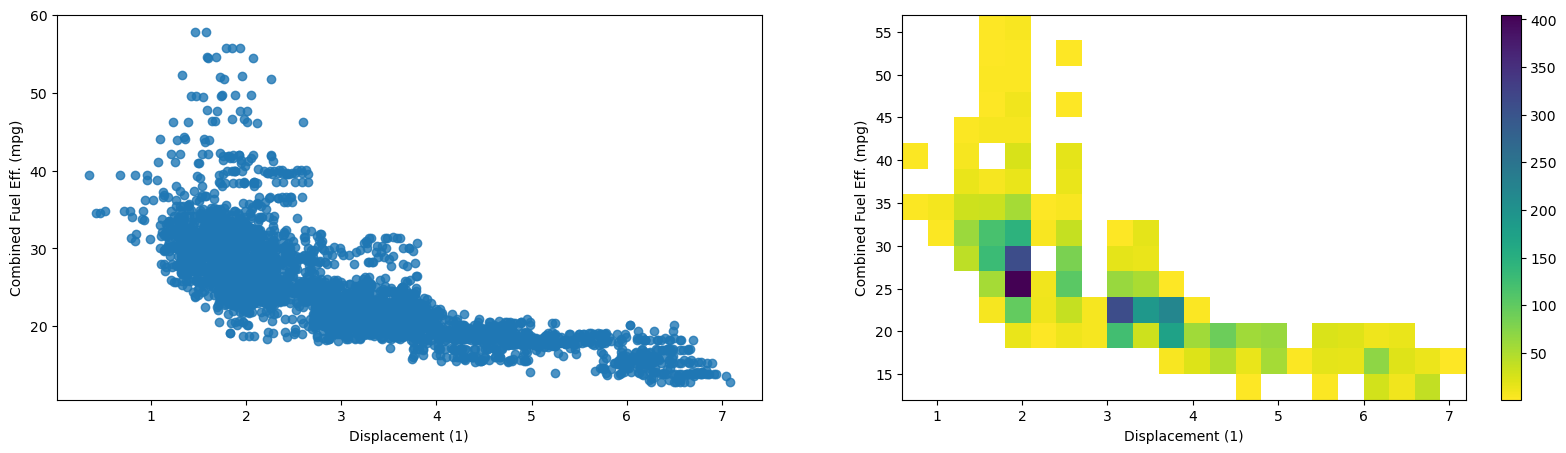

In [7]:
# A scatter plot vs heat plot based on the same data
plt.figure(figsize=(20,5))

# Creating bin edges 
bin_x = np.arange(0.6, 7+0.3, 0.3)
bin_y = np.arange(12, 57+3, 3)



plt.subplot(1,2,1)
sb.regplot(data=fuel_econ,x= 'displ',y='comb',x_jitter=0.3,fit_reg=False);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

plt.subplot(1,2,2)

# cmap define the colormap whereas 'cmin' define to color those area which atleast have 1 data point and the lefted area will
# be white
plt.hist2d(data=fuel_econ,x='displ' , y='comb',cmap='viridis_r',cmin=0.5, bins=[bin_x,bin_y]);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
# To show a colorbar on side of the right chart
plt.colorbar();



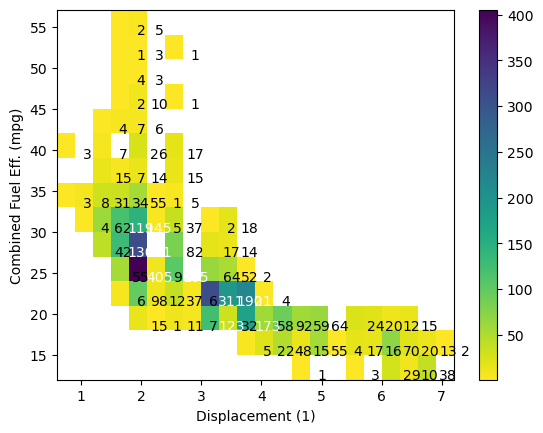

In [9]:
# Now creating the exact above chart but with adding text annotation on each cell using pyplot.text()

# Creating bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 57+3, 3)

h2d = plt.hist2d(data=fuel_econ,x='displ' , y='comb',cmap='viridis_r',cmin=0.5, bins=[bins_x,bins_y]);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]


# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')
# To show a colorbar on side of the right chart
plt.colorbar();



In [10]:
from solutions_bivariate import scatterplot_solution_1, scatterplot_solution_2

In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [11]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **TO DO 1**: 

Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). **Use a _scatter plot_ to depict the data.**
1. What is the general relationship between these variables? 
2. Are there any points that appear unusual against these trends?

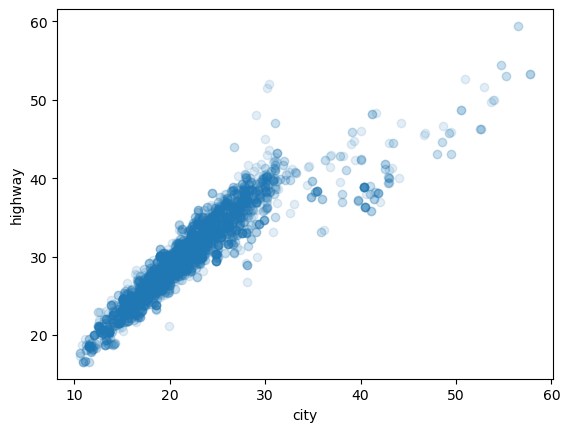

In [14]:
# YOUR CODE HERE
plt.scatter(data=fuel_econ,x='city',y='highway',alpha=1/8);
plt.xlabel('city');
plt.ylabel('highway');

# Here we can see that both of these quantitative variable have positive correlation between them.

### Expected Output

Most of the data falls in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Some transparency is added via 'alpha' to show the concentration of data. Interestingly, for most cars highway mileage is clearly higher than city mileage, but for those cars with city mileage above about 30 mpg, the distinction is less pronounced. In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend. It might be good to call out this trend by adding a diagonal line to the figure using the `plot` function. (See the solution file for that code!)


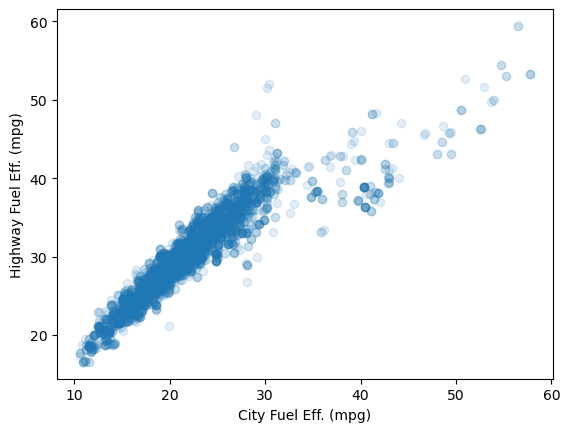

In [13]:
# run this cell to check your work against ours
scatterplot_solution_1()

### **TO DO 2**: 
Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). **Use a heat map to depict the data.** How strong is this trend?

In [32]:
fuel_econ['displ'].describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

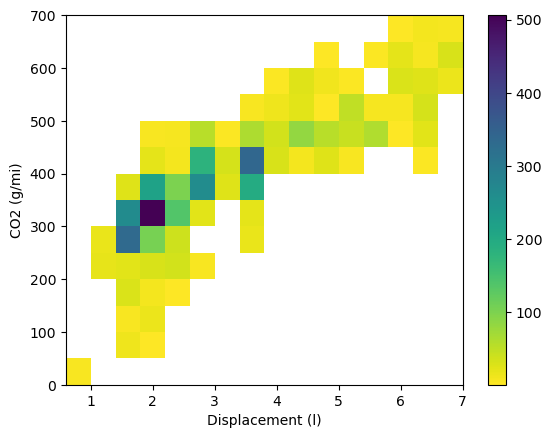

In [31]:
# YOUR CODE HERE

binx = np.arange(0.6, 7+0.4, 0.4)
biny = np.arange(0, 692+50, 50)

plt.hist2d(data=fuel_econ,x='displ', y='co2',cmin=1 , cmap = 'viridis_r', bins =[binx,biny]);
plt.colorbar();
plt.xlabel('Displacement (l)');
plt.ylabel('CO2 (g/mi)');

### Expected Output

In the heat map, I've set up a color map that goes from light to dark, and made it so that any cells without count don't get colored in. The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions. The trend is somewhat broken by those cars with the lowest emissions, which still have engine sizes shared by most cars (between 1 and 3 liters).


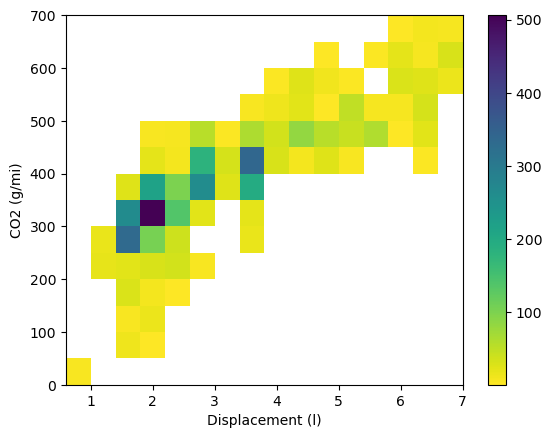

In [22]:
# run this cell to check your work against ours
scatterplot_solution_2()